<a href="https://colab.research.google.com/github/Prashant-1008/Cyber_Believers/blob/main/Phase%205%20(latest)%20(CHECK%20THIS%20ONE..!!).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Complaint Classification Using Machine Learning**
This notebook demonstrates how to classify user complaints into categories and sub-categories using trained machine learning models. It includes steps to:



*   Accept a complaint as input
*   Transform the input using a TF-IDF vectorizer
*   Predict the category and sub-category using pre-trained models




# **Dependencies and Imports**
Ensure you have the required libraries installed before running this notebook.

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d harsh221upadhyay/cyber-crime

Dataset URL: https://www.kaggle.com/datasets/harsh221upadhyay/cyber-crime
License(s): apache-2.0
100% 16.2M/16.2M [00:01<00:00, 22.9MB/s]
100% 16.2M/16.2M [00:01<00:00, 15.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/cyber-crime.zip','r')
zip_ref.extractall('./')
zip_ref.close()

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/data-set/train.csv')

In [ ]:
df1 = pd.read_csv('/content/data-set/test.csv')

## **Training the Dataset**

In [ ]:
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [ ]:
df.isna().sum()

,0
category,0
sub_category,6591
crimeaditionalinfo,21


In [ ]:
df.dropna(inplace = True)

In [ ]:
df.duplicated().sum()

5056

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


# on category

In [ ]:
df['category'].value_counts()

,count
category,
Online Financial Fraud,52496
Online and Social Media Related Crime,12076
Any Other Cyber Crime,10811
Cyber Attack/ Dependent Crimes,3608
Hacking Damage to computercomputer system etc,1709
Cryptocurrency Crime,473
Online Gambling Betting,444
Online Cyber Trafficking,183
Cyber Terrorism,161


# Approach :- Here we have differnt values of various category and some values have same category but different name.so we replace them with one

In [ ]:
df['category'] = df['category'].replace('Report Unlawful Content', 'Online and Social Media Related Crime')

In [ ]:
df['category'] = df['category'].replace('Online Cyber Trafficking', 'Any Other Cyber Crime')

In [ ]:
df['category'] = df['category'].replace('Cyber Terrorism', 'Cyber Attack/ Dependent Crimes')

In [ ]:
df['category'] = df['category'].replace('Ransomware', 'Cyber Attack/ Dependent Crimes')

In [ ]:
df['category'].value_counts()

,count
category,
Online Financial Fraud,52496
Online and Social Media Related Crime,12077
Any Other Cyber Crime,10994
Cyber Attack/ Dependent Crimes,3825
Hacking Damage to computercomputer system etc,1709
Cryptocurrency Crime,473
Online Gambling Betting,444


# on sub-category

In [ ]:
df['sub_category'].value_counts()

,count
sub_category,
UPI Related Frauds,23526
Other,10811
DebitCredit Card FraudSim Swap Fraud,10044
Internet Banking Related Fraud,8096
Fraud CallVishing,5780
Cyber Bullying Stalking Sexting,4051
EWallet Related Fraud,4008
FakeImpersonating Profile,2289
Profile Hacking Identity Theft,2070


# Approach :- here we have also various sub category with same name so we fix it. additionally the data is imbalanced

In [ ]:
df['sub_category'] = df['sub_category'].replace('Against Interest of sovereignty or integrity of India', 'Other')

In [ ]:
df['sub_category'] = df['sub_category'].replace('Intimidating Email', 'Impersonating Email')

In [ ]:
df['sub_category'] = df['sub_category'].replace('EWallet Related Fraud', 'Internet Banking Related Fraud')

In [ ]:
df['sub_category'] = df['sub_category'].replace('Ransomware', 'Ransomware Attack')

In [ ]:
df['sub_category'] = df['sub_category'].replace('Damage to computer computer systems etc', 'Tampering with computer source documents')

In [ ]:
df['sub_category'] = df['sub_category'].replace('Data Breach/Theft', 'Unauthorised AccessData Breach')

# on statement

In [ ]:
df['crimeaditionalinfo'].value_counts()

,count
crimeaditionalinfo,
,11
,10
,10
,9
,9
...,...
Identity theft Fake Customer Care Service Fraud Google\r\nVictim has a problem with her credit card and dialed the customer care number that person asked to give her credit card details and OTP as victim shared her details she lost Rs \r\n,1
As written in my previous complaint fraudster send me QR code saying me to scan and make payment of and same will be received later on as I received rs back but I did not get my money back so he send me to scan QR code and add verification code in amount and add verification code in message As I trusted him because he was saying he was from army department and also phone pe account shown its army department and I know that phone pe get kyc then make account so I trusted him again resulting into debit of rs from my account it was a trap and i stranded in it I request u to kindly do whatever u can do and reimburse my money back either by reversing the same from fraudster account or thru rbi guidelines fraud recovery within days due to insurance of these kind of money This was my hard earned money I dont know how to explain u my situation You are requested to kindly do the needful please please please please please please please please please please please please please please do whatever you can do to get my hard earned money back,1
i was exploring a loan app from google play store\r\ni fount an app named rupee rocket\r\ni logged in and notified this app is not registered from rbi\r\ni deleated the app\r\nat the thime login app asked me to click allow on every permission i did so\r\nalthough i did not submitted any loan application they creadited my bank account rupees and sent me a massage to repay withing days with amount of rs \r\nthey credited my account without my concern and demanding double the money in return\r\ni have mailed them about this situation they did not reply or contact me\r\ni fear they have my contact info they will harrase me by calling them\r\ni am ready to pay the amount they creadited my account but i will not pay any ectra amount\r\ni am very much aware about this kind of loan apps so by researching about the app i deleated the app and i did not submitted any loan application i am sure about this\r\nthey will make me pay the extra amount by calling my contact numbers\r\nhelp me,1


# Approach :- for to clean this column we do use NLTK library

In [ ]:
df.head()

,category,sub_category,crimeaditionalinfo
0,Online and Social Media Related Crime,Cyber Bullying Stalking Sexting,I had continue received random calls and abusi...
1,Online Financial Fraud,Fraud CallVishing,The above fraudster is continuously messaging ...
2,Online Gambling Betting,Online Gambling Betting,He is acting like a police and demanding for m...
3,Online and Social Media Related Crime,Online Job Fraud,In apna Job I have applied for job interview f...
4,Online Financial Fraud,Fraud CallVishing,I received a call from lady stating that she w...


In [ ]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

# Download stopwords if not already done
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
punctuation = string.punctuation

# Function to clean the text
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords and punctuation
    cleaned_tokens = [word for word in tokens if word not in stop_words and word not in punctuation]

    # Join the cleaned tokens back into a string
    cleaned_text = ' '.join(cleaned_tokens)

    return cleaned_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
# Apply the clean_text function to the 'crimeaditionalinfo' column
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(clean_text)


In [ ]:
df['sub_category'] = df['sub_category'].apply(clean_text)

In [ ]:
df['category'] = df['category'].apply(clean_text)

In [ ]:
df.head()

,category,sub_category,crimeaditionalinfo
0,online social media related crime,cyber bullying stalking sexting,continue received random calls abusive message...
1,online financial fraud,fraud callvishing,fraudster continuously messaging asking pay mo...
2,online gambling betting,online gambling betting,acting like police demanding money adding sect...
3,online social media related crime,online job fraud,apna job applied job interview telecalling res...
4,online financial fraud,fraud callvishing,received call lady stating send new phone vivo...


In [ ]:
df.isnull().sum()

,0
category,0
sub_category,0
crimeaditionalinfo,0


In [ ]:
df.duplicated().sum()

6083

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(75935, 3)

<Axes: xlabel='category'>

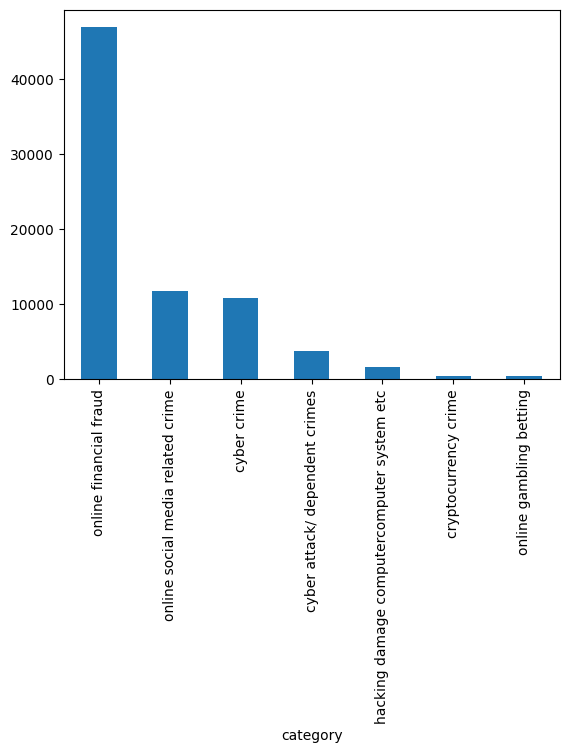

In [ ]:
df['category'].value_counts().plot(kind = 'bar')

<Axes: xlabel='sub_category'>

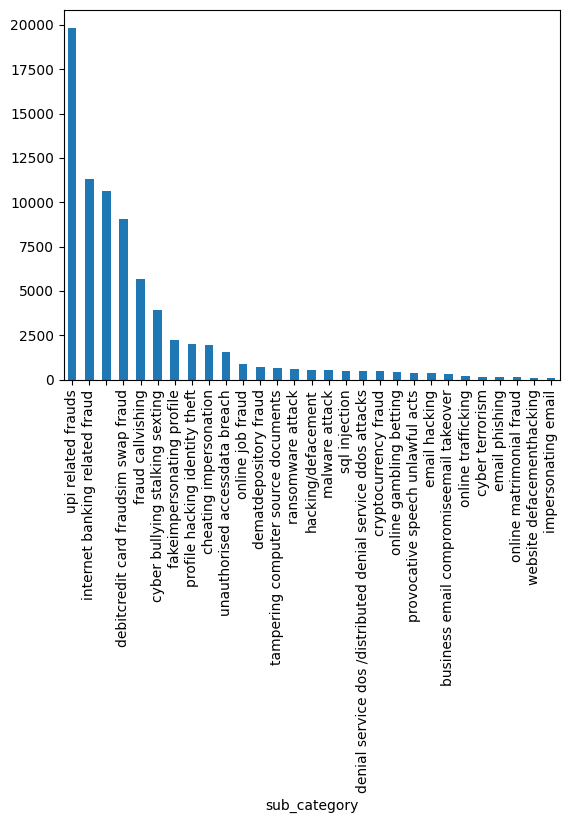

In [ ]:
df['sub_category'].value_counts().plot(kind = 'bar')

In [ ]:
df.head()

,category,sub_category,crimeaditionalinfo
0,online social media related crime,cyber bullying stalking sexting,continue received random calls abusive message...
1,online financial fraud,fraud callvishing,fraudster continuously messaging asking pay mo...
2,online gambling betting,online gambling betting,acting like police demanding money adding sect...
3,online social media related crime,online job fraud,apna job applied job interview telecalling res...
4,online financial fraud,fraud callvishing,received call lady stating send new phone vivo...


# Work on Test Data

In [ ]:
df1.head()

,category,sub_category,crimeaditionalinfo
0,RapeGang Rape RGRSexually Abusive Content,NaN,Sir namaskar mein Ranjit Kumar PatraPaise neh...
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...


In [ ]:
df1.isna().sum()

,0
category,0
sub_category,2236
crimeaditionalinfo,7


In [ ]:
df1.duplicated().sum()

2154

In [ ]:
df1.drop_duplicates(inplace=True)

In [ ]:
df1.dropna(inplace = True)

In [ ]:
df1.duplicated().sum()

0

In [ ]:
df.isna().sum()

,0
category,0
sub_category,0
crimeaditionalinfo,0


In [ ]:
df1.head()

,category,sub_category,crimeaditionalinfo
1,Online Financial Fraud,DebitCredit Card FraudSim Swap Fraud,KOTAK MAHINDRA BANK FRAUD\r\nFRAUD AMOUNT
2,Cyber Attack/ Dependent Crimes,SQL Injection,The issue actually started when I got this ema...
3,Online Financial Fraud,Fraud CallVishing,I am amit kumar from karwi chitrakoot I am tot...
4,Any Other Cyber Crime,Other,I have ordered saree and blouse from rinki s...
5,Online Financial Fraud,Internet Banking Related Fraud,My salary of amount has to be credited to my ...


In [ ]:
df1['category'].value_counts()

,count
category,
Online Financial Fraud,17618
Online and Social Media Related Crime,4122
Any Other Cyber Crime,3662
Cyber Attack/ Dependent Crimes,1261
Hacking Damage to computercomputer system etc,592
Cryptocurrency Crime,164
Online Gambling Betting,134
Online Cyber Trafficking,61
Cyber Terrorism,52


In [ ]:
df1['sub_category'].value_counts()

,count
sub_category,
UPI Related Frauds,7988
Other,3662
DebitCredit Card FraudSim Swap Fraud,3387
Internet Banking Related Fraud,2781
Fraud CallVishing,1822
Cyber Bullying Stalking Sexting,1355
EWallet Related Fraud,1328
FakeImpersonating Profile,762
Profile Hacking Identity Theft,750


In [ ]:
df1['sub_category'] = df1['sub_category'].replace('Computer Generated CSAM/CSEM', 'Other')

In [ ]:
df1['sub_category'] = df1['sub_category'].replace('Cyber Blackmailing & Threatening', 'Other')

In [ ]:
df1['sub_category'] = df1['sub_category'].replace('Ransomware', 'Ransomware Attack')

In [ ]:
df1['sub_category'] = df1['sub_category'].replace('Data Breach/Theft', 'Unauthorised AccessData Breach')

In [ ]:
df1['sub_category'] = df1['sub_category'].replace('Sexual Harassment', 'Other')

In [ ]:
df1['sub_category'] = df1['sub_category'].replace('Intimidating Email', 'Impersonating Email')

In [ ]:
df1['sub_category'] = df1['sub_category'].replace('EWallet Related Fraud', 'Internet Banking Related Fraud')

In [ ]:
df1['crimeaditionalinfo'].value_counts()

,count
crimeaditionalinfo,
online fraud,5
FINANCIAL FRAUD,5
Online financial fraud,5
,4
,4
...,...
Iam rishabh chaubey from vill bhaluahi post office sarawan police station Natwar bihar Rohtash \r\n \r\n Sir I want to say that my father account number has been froud forom internet backing Rs \r\n So sir i want to say that plz help me sir because my father is farmer so sir plz take a actions to this topic plz help me sir,1
I received a call over phone and he made me belived that he is my relative After a long Conversations he made a froud of Rs L,1
FRAUD THROUGH CREDIT CARD\r\nBANK ICICI BANK STATE BANK OF MAURITIUS\r\nCARD NO \r\nTOTAL AMOUNT \r\nPLEASE HOLD REVERSE TOTAL AMOUNT IN THE COMPLAINT ACCOUNT AND TAKE NECESSARY ACTION,1


In [ ]:
df1['crimeaditionalinfo'] = df1['crimeaditionalinfo'].apply(clean_text)

In [ ]:
df1['sub_category'] = df1['sub_category'].apply(clean_text)

In [ ]:
df1['category'] = df1['category'].apply(clean_text)

In [ ]:
df1.head()

,category,sub_category,crimeaditionalinfo
1,online financial fraud,debitcredit card fraudsim swap fraud,kotak mahindra bank fraud fraud amount
2,cyber attack/ dependent crimes,sql injection,issue actually started got email first glance ...
3,online financial fraud,fraud callvishing,amit kumar karwi chitrakoot totally depressed ...
4,cyber crime,,ordered saree blouse rinki sur paid amount tak...
5,online financial fraud,internet banking related fraud,salary amount credited account jan st issue ba...


# Machine Learning Part

In [ ]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer

In [ ]:
X = df['crimeaditionalinfo']
y_category = df['category']
y_subcategory = df['sub_category']

In [ ]:
# Splitting into category and sub-category
X = df['crimeaditionalinfo']
y_category = df['category']
y_sub_category = df['sub_category']

In [ ]:
# Splitting the data for category classification
X_train, X_test, y_train_category, y_test_category = train_test_split(X, y_category, test_size=0.2, random_state=42)

In [ ]:
# Handling missing values using SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
# TF-IDF Vectorization
tfidf = TfidfVectorizer(stop_words='english')
# Handling imbalanced data using SMOTE
smote = SMOTE(random_state=42)


# Logistic Regression

In [ ]:
# Logistic Regression Model for Category Classification
category_model = LogisticRegression()

In [ ]:
# Creating a pipeline for the imputation, TF-IDF, SMOTE, and Logistic Regression
pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),  # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', smote),                                           # Applying SMOTE
    ('logreg', category_model)                                  # Logistic Regression model
])

In [ ]:
# Fitting the model on training data
pipeline.fit(X_train, y_train_category)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer',
                 FunctionTransformer(func=<function <lambda> at 0x7fa41250ba30>)),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('logreg', LogisticRegression())])

In [ ]:
# Prediction and evaluation on test data
y_pred_category = pipeline.predict(X_test)

In [ ]:
# Classification report
print("Category Classification Report:")
print(classification_report(y_test_category, y_pred_category))

Category Classification Report:
                                            precision    recall  f1-score   support

                      cryptocurrency crime       0.39      0.73      0.51       103
            cyber attack/ dependent crimes       0.98      0.95      0.96       765
                               cyber crime       0.33      0.47      0.39      2203
hacking damage computercomputer system etc       0.22      0.54      0.32       360
                    online financial fraud       0.89      0.73      0.80      9328
                   online gambling betting       0.05      0.17      0.07        81
         online social media related crime       0.61      0.59      0.60      2347

                                  accuracy                           0.67     15187
                                 macro avg       0.50      0.60      0.52     15187
                              weighted avg       0.74      0.67      0.70     15187



In [ ]:
# Splitting the data for sub-category classification
X_train, X_test, y_train_sub_category, y_test_sub_category = train_test_split(X, y_sub_category, test_size=0.2, random_state=42)


In [ ]:
sub_category_model = LogisticRegression()

In [ ]:
sub_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),   # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('logreg', sub_category_model)                              # Logistic Regression model for sub-category
])

In [ ]:
sub_category_pipeline.fit(X_train, y_train_sub_category)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('imputer',
                 FunctionTransformer(func=<function <lambda> at 0x7fa40fa51480>)),
                ('tfidf', TfidfVectorizer(stop_words='english')),
                ('smote', SMOTE(random_state=42)),
                ('logreg', LogisticRegression())])

In [ ]:
# Prediction and evaluation on test data for sub-category
y_pred_sub_category = sub_category_pipeline.predict(X_test)
print("Sub-Category Classification Report:")
print(classification_report(y_test_sub_category, y_pred_sub_category))

Sub-Category Classification Report:
                                                             precision    recall  f1-score   support

                                                                  0.40      0.26      0.31      2165
                    business email compromiseemail takeover       0.04      0.13      0.06        55
                                     cheating impersonation       0.10      0.19      0.13       401
                                       cryptocurrency fraud       0.38      0.72      0.50       103
                            cyber bullying stalking sexting       0.60      0.64      0.62       754
                                            cyber terrorism       0.03      0.05      0.04        37
                       debitcredit card fraudsim swap fraud       0.68      0.67      0.67      1892
                                      dematdepository fraud       0.07      0.28      0.12       130
denial service dos /distributed denial service ddos at

In [ ]:
# Additional Imports for XGBoost, LightGBM, and Decision Tree
from xgboost im


from lightgbm import LGBMClassifier
from sklearn.tree import DecisionTreeClassifier


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


# LightGBM

In [ ]:
# LightGBM Model for Category and Sub-Category Classification
lgb_category_model = LGBMClassifier()
lgb_sub_category_model = LGBMClassifier()

# LightGBM Pipeline for Category Classification
lgb_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),  # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('lgb', lgb_category_model)                                 # LightGBM for category
])

# LightGBM Pipeline for Sub-Category Classification
lgb_sub_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),   # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('lgb', lgb_sub_category_model)                             # LightGBM for sub-category
])

# Fitting the LightGBM models on training data
lgb_category_pipeline.fit(X_train, y_train_category)
lgb_sub_category_pipeline.fit(X_train, y_train_sub_category)

# Prediction and evaluation for LightGBM
y_pred_lgb_category = lgb_category_pipeline.predict(X_test)
y_pred_lgb_sub_category = lgb_sub_category_pipeline.predict(X_test)

# Classification reports for LightGBM
print("LightGBM - Category Classification Report:")
print(classification_report(y_test_category, y_pred_lgb_category))

print("LightGBM - Sub-Category Classification Report:")
print(classification_report(y_test_sub_category, y_pred_lgb_sub_category))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 70.315892 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917496
[LightGBM] [Info] Number of data points in the train set: 262892, number of used features: 15807
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Start training from score -1.945910
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 252.953420 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1024299
[LightGBM] [Info] Number of data points in the train set: 460

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


                                                             precision    recall  f1-score   support

                                                                  0.40      0.33      0.36      2165
                    business email compromiseemail takeover       0.07      0.05      0.06        55
                                     cheating impersonation       0.12      0.09      0.10       401
                                       cryptocurrency fraud       0.50      0.58      0.54       103
                            cyber bullying stalking sexting       0.60      0.70      0.64       754
                                            cyber terrorism       0.33      0.03      0.05        37
                       debitcredit card fraudsim swap fraud       0.66      0.71      0.69      1892
                                      dematdepository fraud       0.11      0.15      0.13       130
denial service dos /distributed denial service ddos attacks       0.12      0.15      0.13

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Descision Tree

In [ ]:
# Decision Tree Model for Category and Sub-Category Classification
dt_category_model = DecisionTreeClassifier()
dt_sub_category_model = DecisionTreeClassifier()

# Decision Tree Pipeline for Category Classification
dt_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),  # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('dt', dt_category_model)                                   # Decision Tree for category
])

# Decision Tree Pipeline for Sub-Category Classification
dt_sub_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),   # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('dt', dt_sub_category_model)                               # Decision Tree for sub-category
])

# Fitting the Decision Tree models on training data
dt_category_pipeline.fit(X_train, y_train_category)
dt_sub_category_pipeline.fit(X_train, y_train_sub_category)

# Prediction and evaluation for Decision Tree
y_pred_dt_category = dt_category_pipeline.predict(X_test)
y_pred_dt_sub_category = dt_sub_category_pipeline.predict(X_test)

# Classification reports for Decision Tree
print("Decision Tree - Category Classification Report:")
print(classification_report(y_test_category, y_pred_dt_category))

print("Decision Tree - Sub-Category Classification Report:")
print(classification_report(y_test_sub_category, y_pred_dt_sub_category))


Decision Tree - Category Classification Report:
                                            precision    recall  f1-score   support

                      cryptocurrency crime       0.31      0.42      0.36       103
            cyber attack/ dependent crimes       0.95      0.95      0.95       765
                               cyber crime       0.28      0.34      0.31      2203
hacking damage computercomputer system etc       0.21      0.32      0.25       360
                    online financial fraud       0.82      0.76      0.79      9328
                   online gambling betting       0.04      0.09      0.06        81
         online social media related crime       0.51      0.49      0.50      2347

                                  accuracy                           0.65     15187
                                 macro avg       0.45      0.48      0.46     15187
                              weighted avg       0.68      0.65      0.66     15187

Decision Tree - Sub-Categ

In [ ]:
import pickle

# Ensemble Method

#### Random Forest

## Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

# Individual Models for Category and Sub-Category Classification
logreg_category = LogisticRegression()
logreg_sub_category = LogisticRegression()

# Voting Classifier for Category Classification
voting_category_model = VotingClassifier(estimators=[
    ('logreg', logreg_category),
    ('rf', rf_category_model),
], voting='hard')  # 'hard' voting for majority class

# Voting Classifier for Sub-Category Classification
voting_sub_category_model = VotingClassifier(estimators=[
    ('logreg', logreg_sub_category),
    ('rf', rf_sub_category_model),
], voting='hard')  # 'hard' voting for majority class

# Voting Pipeline for Category Classification
voting_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),  # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('voting', voting_category_model)                            # Voting Classifier for category
])

# Voting Pipeline for Sub-Category Classification
voting_sub_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),   # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('voting', voting_sub_category_model)                        # Voting Classifier for sub-category
])

# Fitting the Voting Classifier models on training data
voting_category_pipeline.fit(X_train, y_train_category)
voting_sub_category_pipeline.fit(X_train, y_train_sub_category)

# Prediction and evaluation for Voting Classifier
y_pred_voting_category = voting_category_pipeline.predict(X_test)
y_pred_voting_sub_category = voting_sub_category_pipeline.predict(X_test)

# Classification reports for Voting Classifier
print("Voting Classifier - Category Classification Report:")
print(classification_report(y_test_category, y_pred_voting_category))

print("Voting Classifier - Sub-Category Classification Report:")
print(classification_report(y_test_sub_category, y_pred_voting_sub_category))


# Adaboost Classifier

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# AdaBoost Model for Category and Sub-Category Classification
ada_category_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)
ada_sub_category_model = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1), random_state=42)

# AdaBoost Pipeline for Category Classification
ada_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),  # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('ada', ada_category_model)                                  # AdaBoost for category
])

# AdaBoost Pipeline for Sub-Category Classification
ada_sub_category_pipeline = Pipeline([
    ('imputer', FunctionTransformer(lambda x: x.fillna(''))),   # Filling missing values
    ('tfidf', tfidf),                                           # TF-IDF vectorizer
    ('smote', SMOTE(random_state=42)),                          # Applying SMOTE
    ('ada', ada_sub_category_model)                              # AdaBoost for sub-category
])

# Fitting the AdaBoost models on training data
ada_category_pipeline.fit(X_train, y_train_category)
ada_sub_category_pipeline.fit(X_train, y_train_sub_category)

# Prediction and evaluation for AdaBoost
y_pred_ada_category = ada_category_pipeline.predict(X_test)
y_pred_ada_sub_category = ada_sub_category_pipeline.predict(X_test)

# Classification reports for AdaBoost
print("AdaBoost - Category Classification Report:")
print(classification_report(y_test_category, y_pred_ada_category))

print("AdaBoost - Sub-Category Classification Report:")
print(classification_report(y_test_sub_category, y_pred_ada_sub_category))
